# SVM no DOLFUT

**Etapas**<br>
<br>
• Passo 0  - Assistir aulas anteriores <br>
• Passo 1  - Carregar bibiotecas<br>
• Passo 2  - Carregar base de dados<br>
• Passo 3  - Tratamento de dados<br>
• Passo 4  - Contrução de alvos e variáveis<br>
• Passo 5  - Preparação da base para treinamento e teste<br>
• Passo 6  - Treinamento do modelo<br>
• Passo 7  - Avaliação de resultados<br>
• Passo 8  - Otimização com Grid Search<br>
• Passo 9  - Treinamento com modelo otimizado<br>
• Passo 10 - Ensemble simples<br>

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, precision_recall_curve, auc, make_scorer, recall_score
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
import os
os.chdir("C:\\Users\\dalto\\Desktop\\Estágio\\Data Science")

dol = pd.read_csv("dados_investpy.csv", sep = ",")

In [4]:
dol["Date"] = pd.to_datetime(dol["Date"]).dt.normalize()
dol = dol.set_index("Date")
dol.head()

,Abertura,Máxima,Mínima,Fechamento,BollingerSup,BollingerInf,BR1Y,BR3Y,BR10Y,US3M,US5Y,US10Y,BRENT,OURO,DXY,MXN,TRY
Date,,,,,,,,,,,,,,,,,
2007-05-16,1985.0,1985.5,1954.0,1956.0,2062.50,1985.05,10.912,10.47,10.119,4.724,4.631,4.716,68.01,660.2,82.16,10.7782,1.3255
2007-05-17,1954.5,1969.5,1953.5,1954.5,2068.42,1971.08,10.904,10.20,9.927,4.723,4.682,4.760,70.27,656.2,82.32,10.8142,1.3260
2007-05-18,1955.0,1972.0,1955.0,1963.0,2070.48,1962.12,10.915,10.25,9.968,4.768,4.732,4.806,69.42,661.0,82.20,10.8000,1.3262
2007-05-21,1956.0,1961.0,1940.0,1940.5,2074.92,1948.83,10.899,10.25,9.868,4.804,4.716,4.788,70.49,662.9,82.36,10.7665,1.3222
2007-05-22,1942.0,1948.0,1934.5,1945.5,2075.32,1939.18,10.895,10.20,9.794,4.867,4.765,4.832,69.52,659.1,82.39,10.7960,1.3290


In [5]:
dol.isna().sum().sum()

9823

In [6]:
dol = dol.replace(0, np.NaN)
dol = dol.fillna(method = "ffill")
dol.isna().sum().sum()

0

In [7]:
dol["BR1Z5"]  = (dol["BR1Y"].rolling(5).std())
dol["BR1Z20"] = (dol["BR1Y"].rolling(20).std())
dol["BR1Z50"] = (dol["BR1Y"].rolling(50).std())

dol["BR3YZ5"]  = (dol["BR3Y"].rolling(5).std())
dol["BR3YZ20"] = (dol["BR3Y"].rolling(20).std())
dol["BR3YZ50"] = (dol["BR3Y"].rolling(50).std())

dol["BR10Z5"]  = (dol["BR10Y"].rolling(5).std())
dol["BR10Z20"] = (dol["BR10Y"].rolling(20).std())
dol["BR10Z50"] = (dol["BR10Y"].rolling(50).std())

dol["US3MZ5"]  = (dol["US3M"].rolling(5).std())
dol["US3MZ20"] = (dol["US3M"].rolling(20).std())
dol["US3MZ50"] = (dol["US3M"].rolling(50).std())

dol["US5YZ5"]  = (dol["US5Y"].rolling(5).std())
dol["US5YZ20"] = (dol["US5Y"].rolling(20).std())
dol["US5YZ50"] = (dol["US5Y"].rolling(50).std())

dol["US10YZ5"]  = (dol["US10Y"].rolling(5).std())
dol["US10YZ20"] = (dol["US10Y"].rolling(20).std())
dol["US10YZ50"] = (dol["US10Y"].rolling(50).std())

dol["OUROZ5"]  = (dol["OURO"].rolling(5).std())
dol["OUROZ20"] = (dol["OURO"].rolling(20).std())
dol["OUROZ50"] = (dol["OURO"].rolling(50).std())

dol["DXYZ5"]  = (dol["DXY"].rolling(5).std())
dol["DXYZ20"] = (dol["DXY"].rolling(20).std())
dol["DXYZ50"] = (dol["DXY"].rolling(50).std())

dol["BRENTZ5"]  = (dol["BRENT"].rolling(5).std())
dol["BRENTZ20"] = (dol["BRENT"].rolling(20).std())
dol["BRENTZ50"] = (dol["BRENT"].rolling(50).std())

dol["MXNZ5"]  = (dol["MXN"].rolling(5).std())
dol["MXNZ20"] = (dol["MXN"].rolling(20).std())
dol["MXNZ50"] = (dol["MXN"].rolling(50).std())

dol["TRYZ5"]  = (dol["TRY"].rolling(5).std())
dol["TRYZ20"] = (dol["TRY"].rolling(20).std())
dol["TRYZ50"] = (dol["TRY"].rolling(50).std())
dol = dol.replace(0, np.NaN)
dol = dol.fillna(method = "ffill")
dol.isna().sum().sum()

792

In [8]:
dol["BR1Y-3"] = dol["BR1Y"].pct_change(3)
dol["BR1Y-5"] = dol["BR1Y"].pct_change(5)
dol["BR1Y-20"] = dol["BR1Y"].pct_change(20)
dol["BR1Y-50"] = dol["BR1Y"].pct_change(50)
dol["BR1Z5"] = (dol["BR1Y"]-(dol["BR1Y"].rolling(5).mean()))/dol["BR1Z5"]
dol["BR1Z20"] = (dol["BR1Y"]-(dol["BR1Y"].rolling(20).mean()))/dol["BR1Z20"]
dol["BR1Z50"] = (dol["BR1Y"]-(dol["BR1Y"].rolling(50).mean()))/dol["BR1Z50"]
dol["BR1Y"] = dol["BR1Y"].pct_change(1)

dol["BR3Y-3"] = dol["BR3Y"].pct_change(3)
dol["BR3Y-5"] = dol["BR3Y"].pct_change(5)
dol["BR3Y-20"] = dol["BR3Y"].pct_change(20)
dol["BR3Y-50"] = dol["BR3Y"].pct_change(50)
dol["BR3YZ5"] = (dol["BR3Y"]-(dol["BR3Y"].rolling(5).mean()))/dol["BR3YZ5"]
dol["BR3YZ20"] = (dol["BR3Y"]-(dol["BR3Y"].rolling(20).mean()))/dol["BR3YZ20"]
dol["BR3YZ50"] = (dol["BR3Y"]-(dol["BR3Y"].rolling(50).mean()))/dol["BR3YZ50"]
dol["BR3Y"] = dol["BR3Y"].pct_change(1)

dol["BR10Y-3"] = dol["BR10Y"].pct_change(3)
dol["BR10Y-5"] = dol["BR10Y"].pct_change(5)
dol["BR10Y-20"] = dol["BR10Y"].pct_change(20)
dol["BR10Y-50"] = dol["BR10Y"].pct_change(50)
dol["BR10Z5"] = (dol["BR10Y"]-(dol["BR10Y"].rolling(5).mean()))/dol["BR10Z5"]
dol["BR10Z20"] = (dol["BR10Y"]-(dol["BR10Y"].rolling(20).mean()))/dol["BR10Z20"]
dol["BR10Z50"] = (dol["BR10Y"]-(dol["BR10Y"].rolling(50).mean()))/dol["BR10Z50"]
dol["BR10Y"] = dol["BR10Y"].pct_change(1)

dol["US3M-3"] = dol["US3M"].pct_change(3)
dol["US3M-5"] = dol["US3M"].pct_change(5)
dol["US3M-20"] = dol["US3M"].pct_change(20)
dol["US3M-50"] = dol["US3M"].pct_change(50)
dol["US3MZ5"] = (dol["US3M"]-(dol["US3M"].rolling(5).mean()))/dol["US3MZ5"]
dol["US3MZ20"] = (dol["US3M"]-(dol["US3M"].rolling(20).mean()))/dol["US3MZ20"]
dol["US3MZ50"] = (dol["US3M"]-(dol["US3M"].rolling(50).mean()))/dol["US3MZ50"]
dol["US3M"] = dol["US3M"].pct_change(1)

dol["US5Y-3"] = dol["US5Y"].pct_change(3)
dol["US5Y-5"] = dol["US5Y"].pct_change(5)
dol["US5Y-20"] = dol["US5Y"].pct_change(20)
dol["US5Y-50"] = dol["US5Y"].pct_change(50)
dol["US5YZ5"] = (dol["US5Y"]-(dol["US5Y"].rolling(5).mean()))/dol["US5YZ5"]
dol["US5YZ20"] = (dol["US5Y"]-(dol["US5Y"].rolling(20).mean()))/dol["US5YZ20"]
dol["US5YZ50"] = (dol["US5Y"]-(dol["US5Y"].rolling(50).mean()))/dol["US5YZ50"]
dol["US5Y"] = dol["US5Y"].pct_change(1)

dol["US10Y-3"] = dol["US10Y"].pct_change(3)
dol["US10Y-5"] = dol["US10Y"].pct_change(5)
dol["US10Y-20"] = dol["US10Y"].pct_change(20)
dol["US10Y-50"] = dol["US10Y"].pct_change(50)
dol["US10YZ5"] = (dol["US10Y"]-(dol["US10Y"].rolling(5).mean()))/dol["US10YZ5"]
dol["US10YZ20"] = (dol["US10Y"]-(dol["US10Y"].rolling(20).mean()))/dol["US10YZ20"]
dol["US10YZ50"] = (dol["US10Y"]-(dol["US10Y"].rolling(50).mean()))/dol["US10YZ50"]
dol["US10Y"] = dol["US10Y"].pct_change(1)


dol["OURO-3"] = dol["OURO"].pct_change(3)
dol["OURO-5"] = dol["OURO"].pct_change(5)
dol["OURO-20"] = dol["OURO"].pct_change(20)
dol["OURO-50"] = dol["OURO"].pct_change(50)
dol["OUROZ5"] = (dol["OURO"]-(dol["OURO"].rolling(5).mean()))/dol["OUROZ5"]
dol["OUROZ20"] = (dol["OURO"]-(dol["OURO"].rolling(20).mean()))/dol["OUROZ20"]
dol["OUROZ50"] = (dol["OURO"]-(dol["OURO"].rolling(50).mean()))/dol["OUROZ50"]
dol["OURO"] = dol["OURO"].pct_change(1)

dol["DXY-3"] = dol["DXY"].pct_change(3)
dol["DXY-5"] = dol["DXY"].pct_change(5)
dol["DXY-20"] = dol["DXY"].pct_change(20)
dol["DXY-50"] = dol["DXY"].pct_change(50)
dol["DXYZ5"] = (dol["DXY"]-(dol["DXY"].rolling(5).mean()))/dol["DXYZ5"]
dol["DXYZ20"] = (dol["DXY"]-(dol["DXY"].rolling(20).mean()))/dol["DXYZ20"]
dol["DXYZ50"] = (dol["DXY"]-(dol["DXY"].rolling(50).mean()))/dol["DXYZ50"]
dol["DXY"] = dol["DXY"].pct_change(1)

dol["BRENT-3"] = dol["BRENT"].pct_change(3)
dol["BRENT5"] = dol["BRENT"].pct_change(5)
dol["BRENT-20"] = dol["BRENT"].pct_change(20)
dol["BRENT-50"] = dol["BRENT"].pct_change(50)
dol["BRENTZ5"] = (dol["BRENT"]-(dol["BRENT"].rolling(5).mean()))/dol["BRENTZ5"]
dol["BRENTZ20"] = (dol["BRENT"]-(dol["BRENT"].rolling(20).mean()))/dol["BRENTZ20"]
dol["BRENTZ50"] = (dol["BRENT"]-(dol["BRENT"].rolling(50).mean()))/dol["BRENTZ50"] 
dol["BRENT"] = dol["BRENT"].pct_change(1)

dol["MXN-3"] = dol["MXN"].pct_change(3)
dol["MXN-5"] = dol["MXN"].pct_change(5)
dol["MXN-20"] = dol["MXN"].pct_change(20)
dol["MXN-50"] = dol["MXN"].pct_change(50)
dol["MXNZ5"] = (dol["MXN"]-(dol["MXN"].rolling(5).mean()))/dol["MXNZ5"] 
dol["MXNZ20"] = (dol["MXN"]-(dol["MXN"].rolling(20).mean()))/dol["MXNZ20"]
dol["MXNZ50"] = (dol["MXN"]-(dol["MXN"].rolling(50).mean()))/dol["MXNZ50"]
dol["MXN"] = dol["MXN"].pct_change(1)

dol["TRY-3"] = dol["TRY"].pct_change(3)
dol["TRY-5"] = dol["TRY"].pct_change(5)
dol["TRY-20"] = dol["TRY"].pct_change(20)
dol["TRY-50"] = dol["TRY"].pct_change(50)
dol["TRYZ5"] = (dol["TRY"]-(dol["TRY"].rolling(5).mean()))/dol["TRYZ5"] 
dol["TRYZ20"] = (dol["TRY"]-(dol["TRY"].rolling(20).mean()))/dol["TRYZ20"]
dol["TRYZ50"] = (dol["TRY"]-(dol["TRY"].rolling(50).mean()))/dol["TRYZ50"]
dol["TRY"] = dol["TRY"].pct_change(1)



In [9]:
dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , "Alta", "Baixa")
#dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , 1, 0)

dol["Retorno"] = dol["Fechamento"].pct_change(1)
dol["Retorno5"] = dol["Fechamento"].pct_change(5)
dol["Retorno20"] = dol["Fechamento"].pct_change(20)
dol["Retorno50"] = dol["Fechamento"].pct_change(50)

dol["DistBoll"] = (dol["BollingerSup"] - dol["BollingerInf"])
dol["MMDistBoll5"] = dol["DistBoll"].rolling(5).mean()
dol["MMDistBoll20"] = dol["DistBoll"].rolling(20).mean()
dol["MMDistBoll50"] = dol["DistBoll"].rolling(50).mean()

# Desvio Padrão
dol["std5"] = dol["Fechamento"].rolling(5).std()
dol["std20"] = dol["Fechamento"].rolling(20).std()
dol["std50"] = dol["Fechamento"].rolling(50).std()

# Proporção do corpo do candle em relação ao range do dia
dol["prop"] = (dol["Fechamento"]-dol["Abertura"])/(dol["Máxima"]-dol["Mínima"])


# Zscore
dol["zscore5"] = (dol["Fechamento"]-dol["Fechamento"].rolling(5).mean())/dol["std5"]
dol["zscore20"] = (dol["Fechamento"]-dol["Fechamento"].rolling(20).mean())/dol["std20"]
dol["zscore50"] = (dol["Fechamento"]-dol["Fechamento"].rolling(50).mean())/dol["std50"]

# RSL
dol["RSL"] = (dol["Fechamento"]/dol["Fechamento"].rolling(15).mean())-1

dol["distMM5"] =dol["Fechamento"] - dol["Fechamento"].rolling(5).mean()
dol["distMM20"] =dol["Fechamento"] - dol["Fechamento"].rolling(20).mean()
dol["distMM50"] =dol["Fechamento"] - dol["Fechamento"].rolling(50).mean()

dol["Pips"] = (dol["Fechamento"].shift(1) - dol["Fechamento"])

In [10]:
dol=dol.dropna(axis=0)

In [12]:
dol = dol.drop(["Abertura", "Fechamento", "Mínima", "Máxima", 'BollingerSup', 'BollingerInf',], axis = 1)
dol.columns

Index(['BR1Y', 'BR3Y', 'BR10Y', 'US3M', 'US5Y', 'US10Y', 'BRENT', 'OURO',
       'DXY', 'MXN',
       ...
       'std50', 'prop', 'zscore5', 'zscore20', 'zscore50', 'RSL', 'distMM5',
       'distMM20', 'distMM50', 'Pips'],
      dtype='object', length=109)

In [13]:
# Treinamento de 2017 a 2020.1
sTrain = "2007-05-16"
eTrain = "2015-12-31"
# Teste de 2020.2 até agora 
sTest = "2016-01-01" #"2020-07-01"
eTest = "2021-09-20"

# dfTrain = dff[dff["Data"] <= eTrain]
# dfTest = dff[dff["Data"] > eTrain]

dfTrain = dol.loc[sTrain : eTrain]
dfTest  = dol.loc[sTest  : eTest]
print(dfTrain.shape)
print(dfTest.shape)

(2430, 109)
(1789, 109)


In [14]:
xTrain = dfTrain.drop(["Alvo"], axis = 1)
yTrain = dfTrain["Alvo"]

xTest = dfTest.drop(["Alvo"], axis = 1)
yTest = dfTest["Alvo"]

In [28]:
from sklearn import svm

In [29]:
# Treinando o modelo

# kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

svm = svm.SVC(kernel = "rbf", max_iter = 100, gamma = "auto", random_state = 42)
svm.fit(xTrain, yTrain)

SVC(gamma='auto', max_iter=100, random_state=42)

In [30]:
predTrain = svm.predict(xTrain)
predTest = svm.predict(xTest)

In [31]:
print(confusion_matrix(yTrain, predTrain))
print()
print("------------------------------------------------")
print()
print(classification_report(yTrain,predTrain))


print()
print("Acurácia: ", round(metrics.accuracy_score(yTrain, predTrain)*100,3))

[[ 120  934]
 [   2 1374]]

------------------------------------------------

              precision    recall  f1-score   support

        Alta       0.98      0.11      0.20      1054
       Baixa       0.60      1.00      0.75      1376

    accuracy                           0.61      2430
   macro avg       0.79      0.56      0.48      2430
weighted avg       0.76      0.61      0.51      2430


Acurácia:  61.481


In [32]:
print(confusion_matrix(yTest, predTest))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest,predTest))

print()
print("Acurácia: ", round(metrics.accuracy_score(yTest, predTest)*100,3))

[[   4  718]
 [  19 1048]]

------------------------------------------------

              precision    recall  f1-score   support

        Alta       0.17      0.01      0.01       722
       Baixa       0.59      0.98      0.74      1067

    accuracy                           0.59      1789
   macro avg       0.38      0.49      0.38      1789
weighted avg       0.42      0.59      0.45      1789


Acurácia:  58.804


In [115]:
predTot = svm.predict(dff.drop(["AlvoBin"], axis = 1))

In [116]:
dff.loc[:, "Previsto"] = predTot
dff.loc[:, "RetornoModelo"] = dff.loc[:, "Previsto"]*dff["Alvo"]

In [117]:
stop = 0.025

dff.loc[:, "RetornoModelo"] = np.where(dff.loc[:, "RetornoModelo"] < -stop, -stop, dff.loc[:, "RetornoModelo"])
dff.loc[:, "RetornoModeloAcum"] = dff["RetornoModelo"].cumsum()

In [118]:
dff.loc[:, "RetornoModeloAcum"].tail()

Data
2021-08-06    3.260389
2021-08-09    3.251912
2021-08-10    3.259309
2021-08-11    3.263409
2021-08-12    3.263029
Name: RetornoModeloAcum, dtype: float64

In [119]:
dff.index.name = "Date"
dff.reset_index(inplace = True)

dff["Date"] = pd.to_datetime(dff["Date"])
dff["trainTest"] = np.where(dff["Date"] > eTrain, 1, -1)

In [120]:
dff.head()

,Date,Volume Financeiro,BollingerSup,BollingerInf,Lag,Retorno,Alvo,Pontos,AlvoBin,prop,...,RSLstd15,V,A,M,F,T,Previsto,RetornoModelo,RetornoModeloAcum,trainTest
0,2014-02-12,40094408250,3930.00,3765.71,3826.80,0.010153,-0.013744,-53.33,0,0.929689,...,8,7,7,6,6,7,1,-0.013744,-0.013744,-1
1,2014-02-13,39429981250,3929.29,3768.71,3817.25,-0.013744,-0.002496,-9.55,0,-0.953543,...,8,3,3,5,3,5,1,-0.002496,-0.016240,-1
2,2014-02-14,37483864125,3925.28,3777.09,3818.85,-0.002496,0.000419,1.60,1,-0.378608,...,8,4,5,5,4,5,1,0.000419,-0.015821,-1
3,2014-02-17,15536250750,3920.47,3786.35,3826.80,0.000419,0.002082,7.95,1,-0.039698,...,7,1,2,2,6,2,1,0.002082,-0.013739,-1
4,2014-02-18,35101248250,3918.47,3791.03,3821.23,0.002082,-0.001456,-5.57,0,0.137782,...,7,6,4,4,4,3,1,-0.001456,-0.015195,-1


In [121]:
bAgreg = dff.resample("M", on = "Date").sum()
bAgreg.loc[:, "RetornoModeloAcum"] = bAgreg["RetornoModelo"].cumsum()*100

""


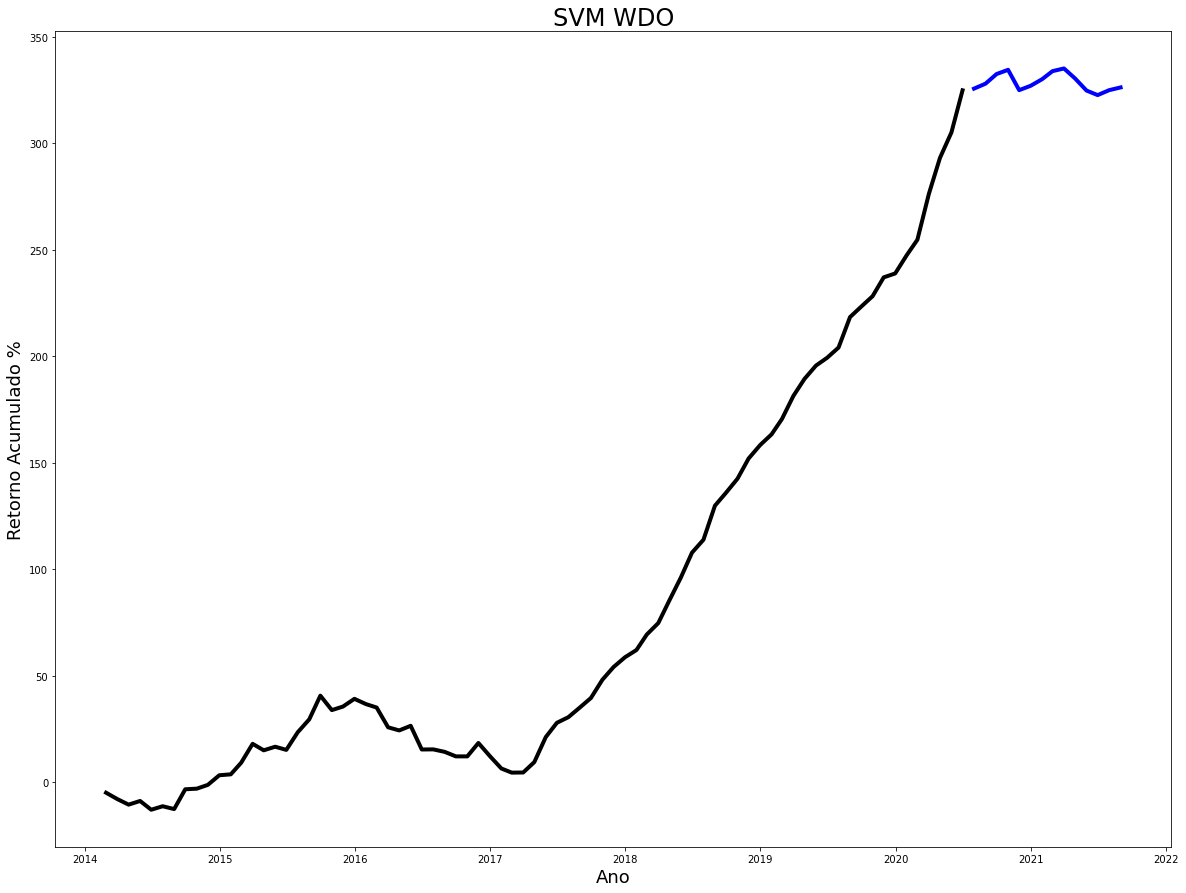

In [122]:
fig,ax = plt.subplots(figsize = (20,15))

def grafico(group):
    color = "black" if (group["trainTest"] < 0).all() else "blue"
    lw = 4.0
    ax.plot(group.index, group.RetornoModeloAcum, c = color, linewidth = lw)
    plt.xlabel("Ano", fontsize = 18)
    plt.ylabel("Retorno Acumulado %", fontsize = 18)
    plt.title("SVM WDO", fontsize = 24)
    #plt.axvline(x = eTrain, color = "purple", linestyle = "--", lw = 2)
    setup = dict(size = 16, color = "darkgreen")
    setup2 = dict(size = 14, color = "black")
    #plt.text('2007-01-01', 500, "Treinamento 2005-2010", **setup)
    #plt.text("2012-01-01", 500, "Teste: 2011-2020", **setup)
    #plt.text("2008-06-01", 500, "ret total 587%", **setup)
    #plt.text("2008-06-01", 500, "Ret Teste 218%", **setup)
    #plt.text("2011-03-01", 500, "@daltonlbs", **setup)
    
bAgreg.groupby((bAgreg["trainTest"].shift() * bAgreg["trainTest"] < 0).cumsum()).apply(grafico)

In [40]:
svm2 = svm.SVC(kernel = "rbf")

parametros = {
    "C":np.arange(1,4,1), #1,11,1
    "max_iter" : np.arange(100,1000,100), #100,2100,100 
    "gamma" : np.arange(0.01,0.5,0.1) #0.01,1.1,0.1 
}

In [41]:
scorers = {
    "accuracy_score" : make_scorer(accuracy_score)
}

In [49]:
def otimizacao (refit_score = "accuracy_score"):
    inicio = int(time.time())
    
    cv= StratifiedKFold(n_splits = 10) # Uma instância de CrossValidation com split de 10
    
    # O GridSearch vai testar as variáveis colocadas em 'parametros' e buscar o melhor conjunto
    gridSearch = GridSearchCV(svm2, parametros, scoring= scorers, refit= refit_score, 
                              cv=cv, return_train_score = True)
    gridSearch.fit(xTrain, yTrain)
    
    # Predição ba base de teste
    predTrain = gridSearch.predict(xTrain)
    predTest = gridSearch.predict(xTest)
    
    print("Melhores parametros para o {}".format(refit_score))
    print(gridSearch.best_params_)
    
    # Matriz de confusão na base de treinamento
    print("nMatriz de confusão da SVM para {} na base de treinamento:".format(refit_score))
    print(pd.DataFrame(confusion_matrix(yTrain, predTrain),
                       columns = ["predVende", "predNada", "PredCompra"], index= ["vende", "nada", "compra"]))  
    
    # Matriz de confusão na base de teste
    print("\nMatriz de confusão da SVM para {} na base de teste:".format(refit_score))
    print(pd.DataFrame(confusion_matrix(yTest, predTest),
                       columns = ["predVende", "predNada", "PredCompra"], index= ["vende", "nada", "compra"]))
    #print("Tempo de execução: %s minutos" % ((time.time() - inicio))/60)
    return gridSearch

In [50]:
otmzSVM = otimizacao(refit_score = "accuracy_score")

Melhores parametros para o accuracy_score
{'C': 2, 'gamma': 0.01, 'max_iter': 900}
nMatriz de confusão da SVM para accuracy_score na base de treinamento:
        predVende  predNada  PredCompra
vende         403       173          95
nada          193       277          74
compra        237       158         201
nMatriz de confusão da SVM para accuracy_score na base de teste:
        predVende  predNada  PredCompra
vende         342       187         153
nada          234       149          81
compra        338       214         168


In [51]:
otmzSVM

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': array([1, 2, 3, 4]),
                         'gamma': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61]),
                         'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
             refit='accuracy_score', return_train_score=True,
             scoring={'accuracy_score': make_scorer(accuracy_score)})

In [52]:
dfTrain3 = dff3.loc[sTrain : eTrain]
dfTest3 = dff3.loc[sTest : eTest]

svm3 = svm.SVC(kernel = "rbf", C = 2, gamma = 0.01, max_iter = 900, random_state = 42)
svm3.fit(xTrain, yTrain)

SVC(C=2, gamma=0.01, max_iter=900, random_state=42)

In [53]:
predTrain3 = svm3.predict(xTrain)
predTest3 = svm3.predict(xTest)

In [54]:
print(confusion_matrix(yTrain, predTrain3))
print()
print("------------------------------------------------")
print()
print(classification_report(yTrain,predTrain3))

[[403 173  95]
 [193 277  74]
 [237 158 201]]

------------------------------------------------

              precision    recall  f1-score   support

          -1       0.48      0.60      0.54       671
           0       0.46      0.51      0.48       544
           1       0.54      0.34      0.42       596

    accuracy                           0.49      1811
   macro avg       0.49      0.48      0.48      1811
weighted avg       0.49      0.49      0.48      1811



In [55]:
print(confusion_matrix(yTest, predTest3))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest,predTest3))

[[342 187 153]
 [234 149  81]
 [338 214 168]]

------------------------------------------------

              precision    recall  f1-score   support

          -1       0.37      0.50      0.43       682
           0       0.27      0.32      0.29       464
           1       0.42      0.23      0.30       720

    accuracy                           0.35      1866
   macro avg       0.35      0.35      0.34      1866
weighted avg       0.37      0.35      0.35      1866



In [56]:
predTot3 = svm3.predict(dff3.iloc[:,9:24])

In [57]:
dff3.loc[:, "Previsto"] = predTot3
dff3.loc[:, "RetornoModelo"] = dff3.loc[:, "Previsto"]*dff3["Alvo"]

stop = 0.025

dff3.loc[:, "RetornoModelo"] = np.where(dff3.loc[:, "RetornoModelo"] < -stop, -stop, dff3.loc[:, "RetornoModelo"])
dff3.loc[:, "RetornoModeloAcum"] = dff3["RetornoModelo"].cumsum()

In [58]:
dff3["RetornoModeloAcum"].tail()

Data
2020-08-12    3.871826
2020-09-12    3.899859
2020-10-12    3.899859
2020-11-12    3.890590
2020-12-14    3.896061
Name: RetornoModeloAcum, dtype: float64

In [59]:
dff3.index.name = "Date"
dff3.reset_index(inplace = True)

dff3["Date"] = pd.to_datetime(dff3["Date"])
dff3["trainTest"] = np.where(dff3["Date"] > eTrain, 1, -1)

In [60]:
bAgreg3 = dff3.resample("M", on = "Date").sum()
bAgreg3.loc[:, "RetornoModeloAcum"] = bAgreg3["RetornoModelo"].cumsum()*100

""


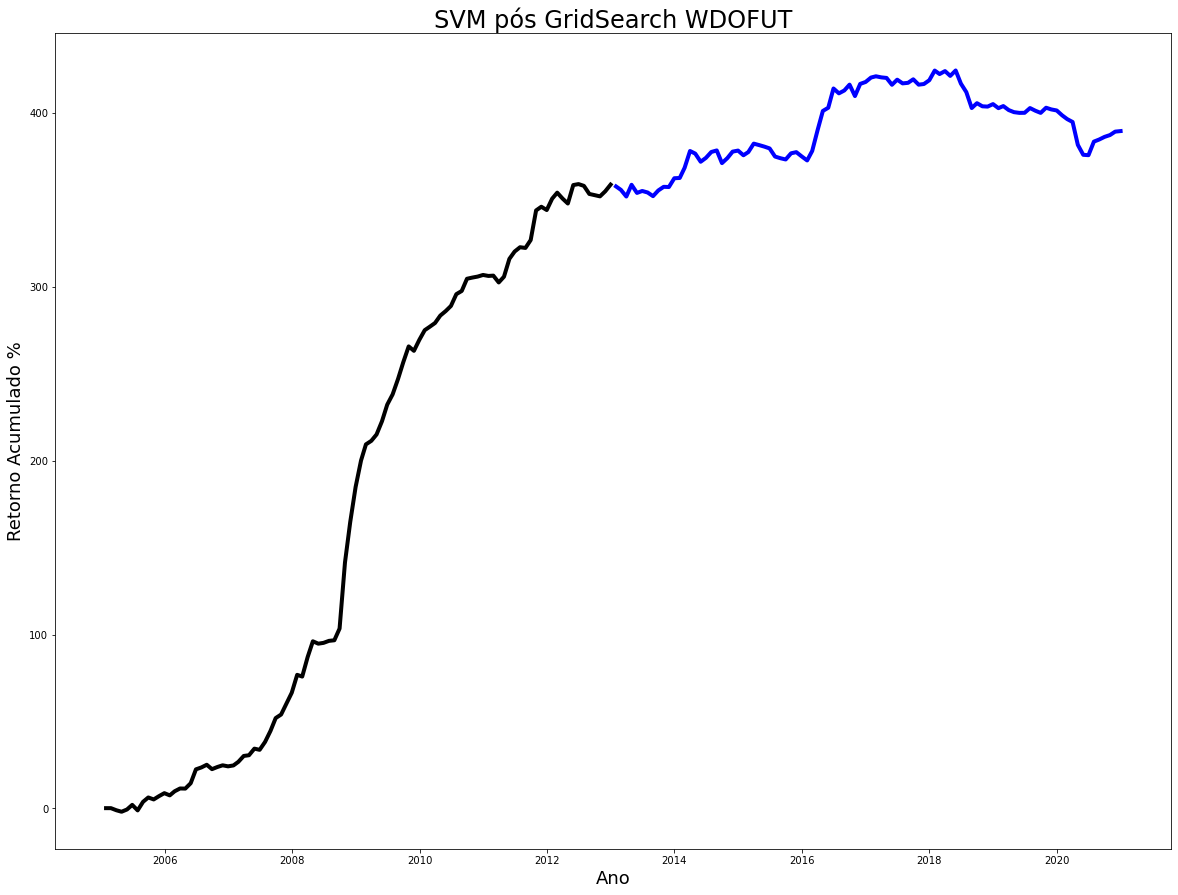

In [73]:
fig,ax = plt.subplots(figsize = (20,15))

def grafico(group):
    color = "black" if (group["trainTest"] < 0).all() else "blue"
    lw = 4.0
    ax.plot(group.index, group.RetornoModeloAcum, c = color, linewidth = lw)
    plt.xlabel("Ano", fontsize = 18)
    plt.ylabel("Retorno Acumulado %", fontsize = 18)
    plt.title("SVM pós GridSearch WDOFUT", fontsize = 24)
    #plt.axvline(x = eTrain, color = "purple", linestyle = "--", lw = 2)
    setup = dict(size = 16, color = "darkgreen")
    setup2 = dict(size = 14, color = "black")
    #plt.text('2007-01-01', 500, "Treinamento 2005-2010", **setup)
    #plt.text("2012-01-01", 500, "Teste: 2011-2020", **setup)
    #plt.text("2008-06-01", 500, "ret total 587%", **setup)
    #plt.text("2008-06-01", 500, "Ret Teste 218%", **setup)
    #plt.text("2011-03-01", 500, "@daltonlbs", **setup)
    
bAgreg3.groupby((bAgreg3["trainTest"].shift() * bAgreg3["trainTest"] < 0).cumsum()).apply(grafico)

In [62]:
dfTrain4 = dff4.loc[sTrain : eTrain]
dfTest4 = dff4.loc[sTest : eTest]

In [63]:
prop = 0.5
propc = 1-prop

predTrain4 = (predTrain*prop + predTrain3*propc)
predTest4 = (predTest*prop + predTest3*propc)

In [64]:
predTrain4

array([-1. ,  0.5,  1. , ..., -1. ,  1. , -1. ])

In [65]:
predTrain4 = np.where(predTrain4 >= 0.5, 1, predTrain4)
predTrain4 = np.where(predTrain4 < -0.5, -1, predTrain4)
predTrain4 = np.where(((predTrain4 != -1) & (predTrain4 !=1)), 0, predTrain4)

predTest4 = np.where(predTest4 >= 0.5, 1, predTest4)
predTest4 = np.where(predTest4 < -0.5, -1, predTest4)
predTest4 = np.where(((predTest4 != -1) & (predTest4 !=1)), 0, predTest4)


In [67]:
print(confusion_matrix(yTrain, predTrain4))
print()
print("------------------------------------------------")
print()
print(classification_report(yTrain,predTrain4))

[[390 246  35]
 [ 99 376  69]
 [ 95 219 282]]

------------------------------------------------

              precision    recall  f1-score   support

          -1       0.67      0.58      0.62       671
           0       0.45      0.69      0.54       544
           1       0.73      0.47      0.57       596

    accuracy                           0.58      1811
   macro avg       0.62      0.58      0.58      1811
weighted avg       0.62      0.58      0.58      1811



In [68]:
predTot4 = (predTot*prop + predTot3*propc)

predTot4 = np.where(predTot4 >= 0.5, 1, predTot4)
predTot4 = np.where(predTot4 < -0.5, -1, predTot4)
predTot4 = np.where(((predTot4 != -1) & (predTot4 !=1)), 0, predTot4)

In [69]:
dff4.loc[:, "Previsto"] = predTot4
dff4.loc[:, "RetornoModelo"] = dff4.loc[:, "Previsto"]*dff4["Alvo"]

stop = 0.025

dff4.loc[:, "RetornoModelo"] = np.where(dff4.loc[:, "RetornoModelo"] < -stop, -stop, dff4.loc[:, "RetornoModelo"])
dff4.loc[:, "RetornoModeloAcum"] = dff4["RetornoModelo"].cumsum()

In [70]:
dff4.index.name = "Date"
dff4.reset_index(inplace = True)

dff4["Date"] = pd.to_datetime(dff4["Date"])
dff4["trainTest"] = np.where(dff4["Date"] > eTrain, 1, -1)

In [71]:
bAgreg4 = dff4.resample("M", on = "Date").sum()
bAgreg4.loc[:, "RetornoModeloAcum"] = bAgreg4["RetornoModelo"].cumsum()*100

""


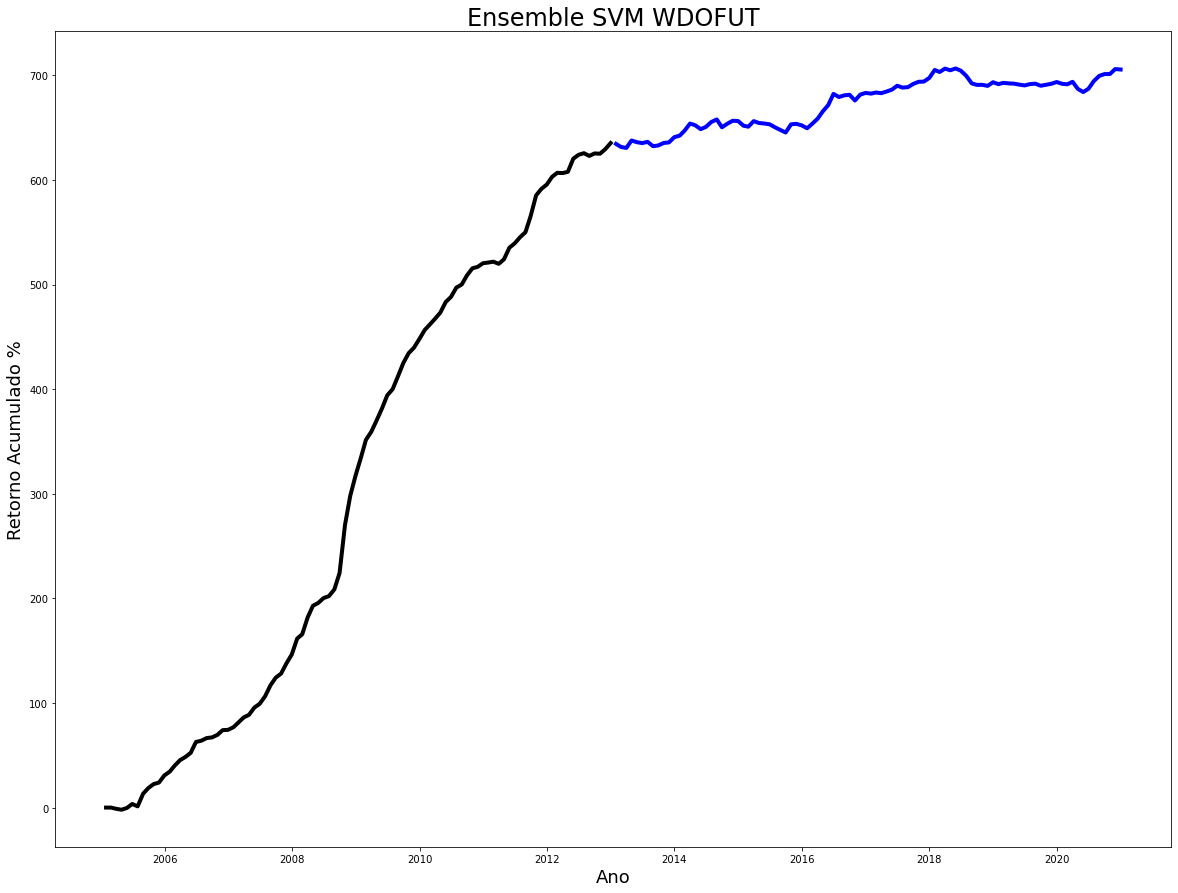

In [85]:
fig,ax = plt.subplots(figsize = (20,15))

def grafico(group):
    color = "black" if (group["trainTest"] < 0).all() else "blue"
    lw = 4.0
    ax.plot(group.index, group.RetornoModeloAcum, c = color, linewidth = lw)
    plt.xlabel("Ano", fontsize = 18)
    plt.ylabel("Retorno Acumulado %", fontsize = 18)
    plt.title("Ensemble SVM WDOFUT", fontsize = 24)
    #plt.axvline(x = eTrain, color = "purple", linestyle = "--", lw = 2)
    setup = dict(size = 16, color = "darkgreen")
    setup2 = dict(size = 14, color = "black")
    #plt.text('2007-01-01', 500, "Treinamento 2005-2010", **setup)
    #plt.text("2012-01-01", 500, "Teste: 2011-2020", **setup)
    #plt.text("2008-06-01", 500, "ret total 587%", **setup)
    #plt.text("2008-06-01", 500, "Ret Teste 218%", **setup)
    #plt.text("2011-03-01", 500, "@daltonlbs", **setup)
    
bAgreg4.groupby((bAgreg4["trainTest"].shift() * bAgreg4["trainTest"] < 0).cumsum()).apply(grafico)

In [78]:
dfTest4.loc[: , "Previsto"] = predTest4
dfTest4.loc[: , "RetornoModelo"] = dfTest4.loc[: , "Previsto"]*dfTest4["Alvo"]

#Simulando um stop
dfTest4.loc[: , "RetornoModelo"] = np.where(dfTest4.loc[: , 'RetornoModelo'] < -stop
                                               , -stop, dfTest4.loc[: , 'RetornoModelo'])

dfTest4.loc[: , "RetornoModeloAcum"] = dfTest4["RetornoModelo"].cumsum()


In [82]:
dfTest4.head()

,Date,Abertura,Maxima,Minima,Fechamento,Lag,Retorno,Alvo,Pontos,AlvoBin,...,A,F,T,W,K,Tau,G,Previsto,RetornoModelo,RetornoModeloAcum
Date,,,,,,,,,,,,,,,,,,,,,
0,2013-02-01,2041.0,2056.5,2041.0,2055.5,2057.0,-0.001700,0.000730,1.5,0,...,6,2,4,2,3,6,3,0.0,0.000000,0.000000
1,2013-03-01,2057.0,2059.5,2043.5,2057.0,2043.5,0.000730,-0.006563,-13.5,-1,...,3,6,3,6,5,2,2,-1.0,0.006563,0.006563
2,2013-04-01,2057.5,2059.0,2041.0,2043.5,2039.0,-0.006563,-0.002202,-4.5,0,...,8,2,3,2,0,3,4,-1.0,0.002202,0.008765
3,2013-07-01,2044.0,2045.5,2033.0,2039.0,2050.0,-0.002202,0.005395,11.0,1,...,4,4,4,4,1,4,4,0.0,0.000000,0.008765
4,2013-08-01,2036.5,2050.0,2029.5,2050.0,2050.0,0.005395,0.000000,0.0,0,...,2,6,4,6,3,2,3,0.0,0.000000,0.008765


In [83]:
#dfTest4.index.name = "Date"
#dfTest4.reset_index(inplace = True)

dfTest4["Date"] = pd.to_datetime(dfTest4["Date"])
teste_agregado4 = dfTest4.resample("M", on = "Date").sum()

teste_agregado4.loc[: , "RetornoModeloAcum"] = teste_agregado4["RetornoModelo"].cumsum()*100

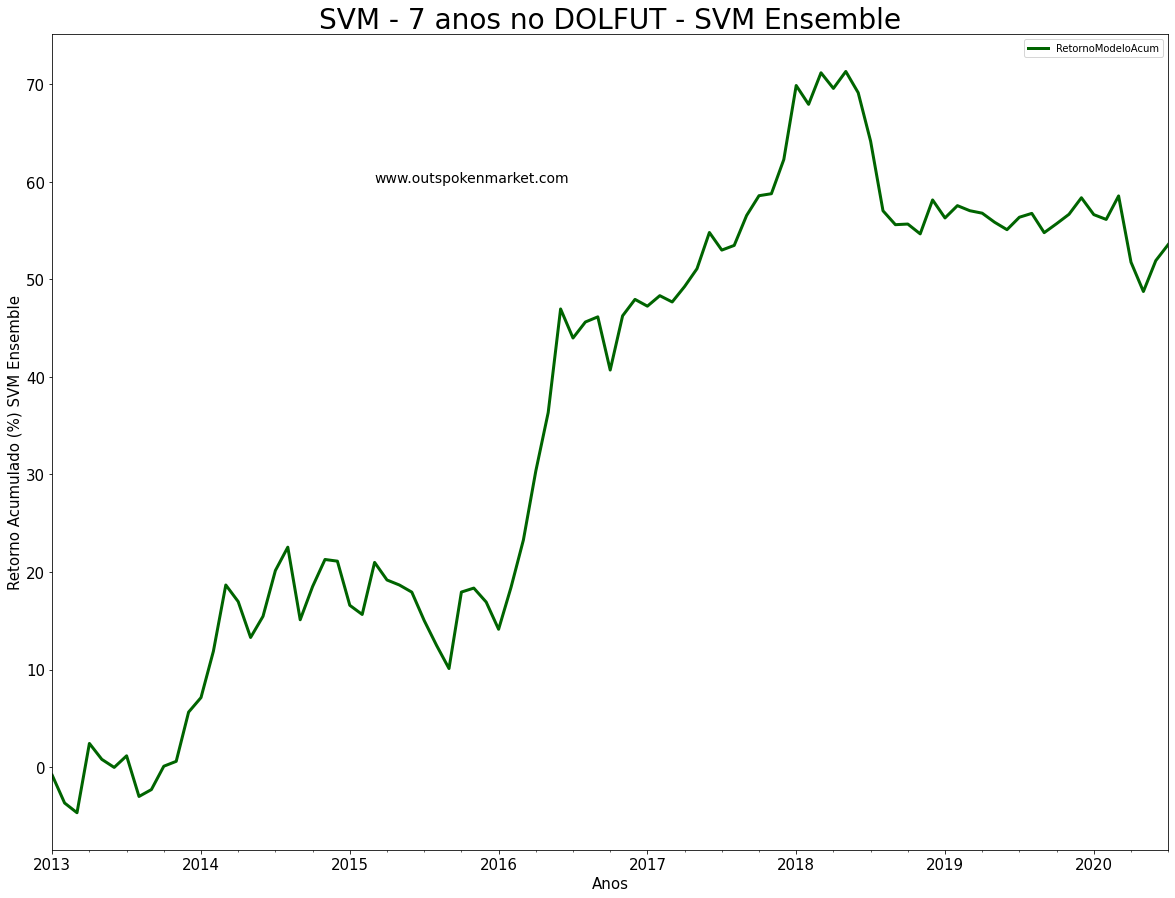

In [84]:
teste_agregado4["RetornoModeloAcum"].plot(figsize=(20,15)
                                     , linewidth = 3
                                     , fontsize = 15
                                     , color = "darkgreen")
plt.xlabel("Anos"
           , fontsize = 15);
plt.ylabel("Retorno Acumulado (%) SVM Ensemble"
           , fontsize = 15);
plt.title("SVM - 7 anos no DOLFUT - SVM Ensemble", fontsize = 28)
setup2 = dict(size = 14, color = "black")
plt.text("2015-03-01", 60, "www.outspokenmarket.com", **setup2)
plt.legend()
plt.show()